In [2]:
!pip install ucimlrepo

In [40]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

# TARGET VARIABLE = 'quality'

In [41]:
WHITE_WINE_CSV = '/content/winequality-white.csv'
white_wine_df = pd.read_csv(WHITE_WINE_CSV, sep=';')

#white_wine_df.head(5)

# Question 1
print(white_wine_df.astype(int).describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.407105          0.000408     0.001429        5.951817   
std         0.889922          0.020205     0.037781        5.056241   
min         3.000000          0.000000     0.000000        0.000000   
25%         6.000000          0.000000     0.000000        1.000000   
50%         6.000000          0.000000     0.000000        5.000000   
75%         7.000000          0.000000     0.000000        9.000000   
max        14.000000          1.000000     1.000000       65.000000   

       chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count     4898.0          4898.000000           4898.000000  4898.000000   
mean         0.0            35.302572            138.357901     0.019396   
std          0.0            17.000040             42.493627     0.137925   
min          0.0             2.000000              9.000

<function matplotlib.pyplot.show(close=None, block=None)>

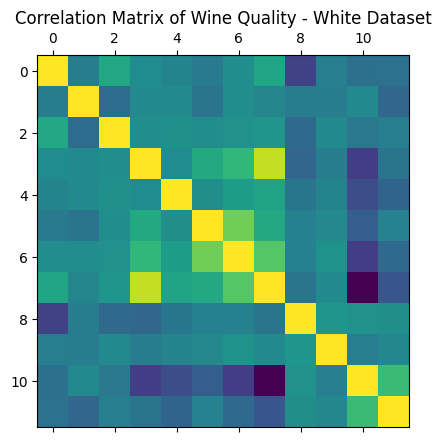

In [42]:
# Question 2
plt.matshow(white_wine_df.corr())
plt.title('Correlation Matrix of Wine Quality - White Dataset')
plt.show

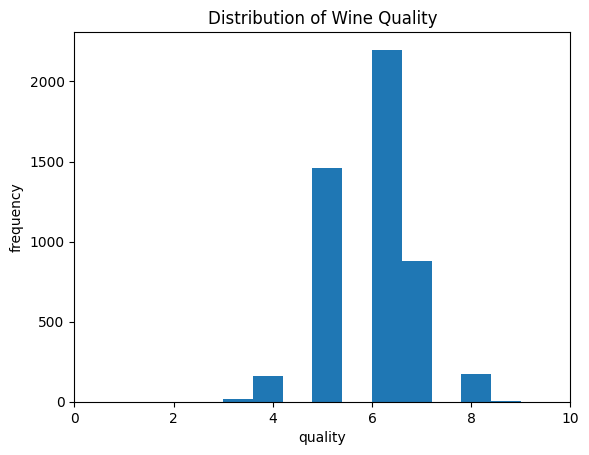

In [43]:
# Question 3
ax = (white_wine_df['quality']).plot.hist()
ax.set_xlabel('quality')
ax.set_ylabel('frequency')
ax.set_title('Distribution of Wine Quality')
ax.set_xlim(0, 10)
plt.show()


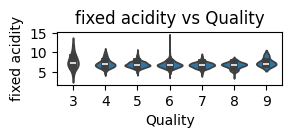

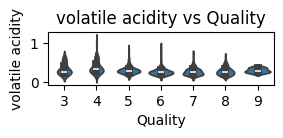

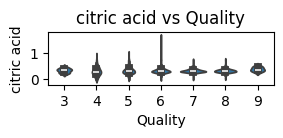

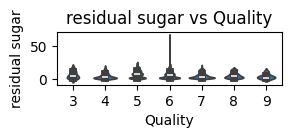

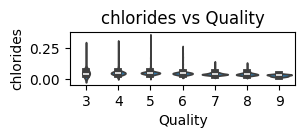

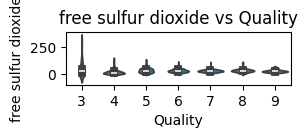

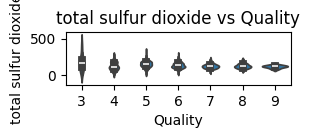

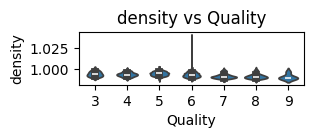

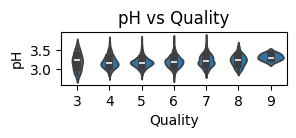

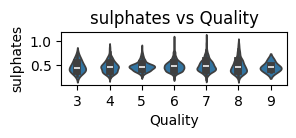

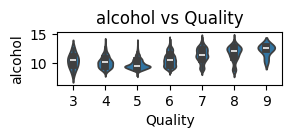

In [44]:
# Question 4
features = white_wine_df.columns.drop('quality')
for i, feature in enumerate(features):
  plt.subplot(6, 2, i+1)
  sns.violinplot(data=white_wine_df, x = 'quality', y = feature)
  plt.xlabel('Quality')
  plt.ylabel(feature)
  plt.title(f'{feature} vs Quality')
  plt.show()


In [45]:
# Question 5
model = LinearRegression()
model.fit(white_wine_df[['alcohol']], white_wine_df['quality'])

fitted = model.predict(white_wine_df[['alcohol']])
RMSE = np.sqrt(mean_squared_error(white_wine_df['quality'], fitted))
r2 = r2_score(white_wine_df['quality'], fitted)

print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

b0 = 2.582009399174922
b1 = 0.3134693019118325
RMSE = 0.7971284628753889
r2 = 0.1897253327492563


In [46]:
# Question 6
model = LinearRegression()
model.fit(white_wine_df[['volatile acidity', 'alcohol', 'density']], white_wine_df['quality'])

fitted = model.predict(white_wine_df[['volatile acidity', 'alcohol', 'density']])
RMSE = np.sqrt(mean_squared_error(white_wine_df['quality'], fitted))
r2 = r2_score(white_wine_df['quality'], fitted)

print(f'b0 = {model.intercept_}')
print(f'Coef for volatile_acidity: b1 = {model.coef_[0]}')
print(f'Coef for alcohol: b2 = {model.coef_[1]}')
print(f'Coef for density: b3 = {model.coef_[2]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

b0 = -36.498611307001624
Coef for volatile_acidity: b1 = -2.0721159353329517
Coef for alcohol: b2 = 0.3988928244435385
Coef for density: b3 = 38.99188669384589
RMSE = 0.76848726881725
r2 = 0.24690635619896484
